In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hockey_stick(x,a,b,c):
    x_use = np.copy(x[0])
    vdisk = np.copy(x[1])
    x_use[x_use < c] = c
    return a + b * x_use/vdisk**2


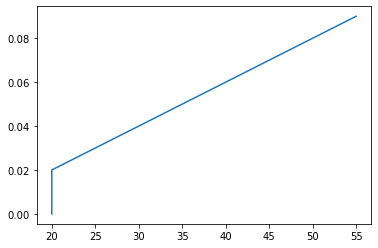

In [3]:
x1vals = np.arange(0,0.1,0.01)
x2vals = np.ones(len(x1vals))
xvals = np.vstack([x1vals,x2vals])
yvals = hockey_stick(xvals,10,500,0.02)
plt.plot(yvals,xvals[0])
plt.show()

In [4]:
x1vals

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [5]:
x2vals

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
len(x2vals)

10

In [7]:
xvals

array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]])

In [8]:
yvals

array([20., 20., 20., 25., 30., 35., 40., 45., 50., 55.])

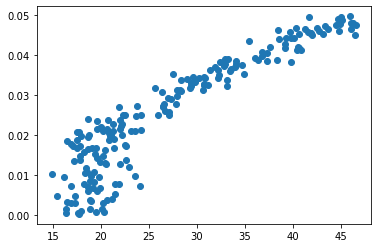

In [9]:
#generate fake data
N = 200
rng = np.random.default_rng()
x1 = 0.05*rng.random(size = N)
x2 = np.ones(N)
x = np.vstack([x1,x2])
y = hockey_stick(x,1,900,0.02)
y = y + 2 * rng.normal(size = N)
plt.scatter(y,x[0])

In [6]:
popt,pcov = opt.curve_fit(hockey_stick,x,y,p0=[1.5,1000,0.025])
print(popt)

[1.02447708e+00 9.01355599e+02 2.00825506e-02]


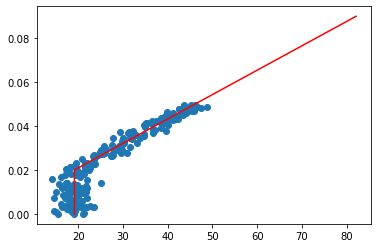

In [7]:
plt.scatter(y,x[0])
yvals=hockey_stick(xvals,popt[0],popt[1],popt[2])
plt.plot(yvals,xvals[0],color='red')

In [15]:
def spin_vdisk2_wsmallgals_4_func(spin_vdisk, a, b, spin_min):
    # spin_vdisk is a 2,M array that contains HalopropSpin and GalpropNormVdisk
    # spin is spin_vdisk[0]
    # vdisk is spin_vdisk[1]
    
    spin_use = np.copy(spin_vdisk[0])
    vdisk = np.copy(spin_vdisk[1])
    spin_use[spin_use < spin_min] = spin_min
    
    size = a + b*spin_use/vdisk**2

    return size

In [17]:
popt1,pcov1 = opt.curve_fit(spin_vdisk2_wsmallgals_4_func,x,y,p0=[1.5,1000,0.025])

print(popt1)

[1.25823294e+00 8.88181877e+02 2.02325103e-02]


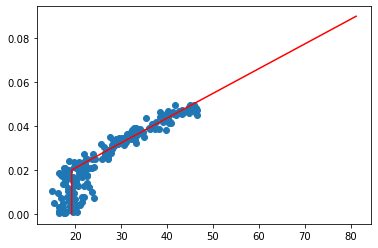

In [18]:
plt.scatter(y,x[0])
yvals1=spin_vdisk2_wsmallgals_4_func(xvals,popt1[0],popt1[1],popt1[2])
plt.plot(yvals1,xvals[0],color='red')